# *Baseline Model 2*: RandomForest

### As the second baseline model, I wanted to experiment more with non-linear approaches to perhaps improve some of the more underperforming predictions. RandomForest is useful because it can pick up more on nuanced relationships and handles noise and overfitting well -- something quite common in gene expression datasets.

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
sys.path.append("../src")

from plotting import plot_pred_vs_obs
from feature import prepare_features, get_drug_data
from randomforest import run_randomforest

df = pd.read_parquet("../data/df_clean.parquet")
mut_df = pd.read_parquet("../data/mut_df_clean.parquet")

In [2]:
drug_features = {}
drugs = ["Cisplatin", "PLX-4720", "Selumetinib", "Trametinib", "Nutlin-3a (-)"]

for drug in drugs:
    X, X_mut, y = get_drug_data(df, mut_df, drug)
    drug_features[drug] = {"X": X, "X_mut": X_mut, "y": y}

## *Nonlinear Baseline Model:* Random Forest Regressor

In [3]:
os.makedirs("saved_results", exist_ok=True)

drug_rf_results = {}

for drug in drugs:
    X = drug_features[drug]["X"]
    y = drug_features[drug]["y"]
    
    print("="*60)
    print(f"Drug Name: {drug}")
    df_rf_results = run_randomforest(X, y, max_samples=None)
    
    drug_rf_results[drug] = df_rf_results
    with open(f"saved_results/{drug}_rf.pkl", "wb") as f:
        pickle.dump(df_rf_results, f)
    print("="*60)

Drug Name: Cisplatin
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.159
Test R2: 0.079, RMSE: 1.336, Pearson: 0.287, Spearman: 0.272
Drug Name: PLX-4720
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.296
Test R2: 0.195, RMSE: 1.255, Pearson: 0.450, Spearman: 0.394
Drug Name: Selumetinib
Best params: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None}, CV R2: 0.296
Test R2: 0.191, RMSE: 1.355, Pearson: 0.449, Spearman: 0.433
Drug Name: Trametinib
Best params: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 10}, CV R2: 0.472
Test R2: 0.478, RMSE: 1.736, Pearson: 0.698, Spearman: 0.656
Drug Name: Nutlin-3a (-)
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.364
Test R2: 0.262, RMSE: 1.158, Pearson: 0.515, Spearman: 0.544


In [4]:
os.makedirs("saved_results", exist_ok=True)

drug_mut_rf_results = {}

for drug in drugs:
    X = drug_features[drug]["X"]
    y = drug_features[drug]["y"]
    
    print("="*60)
    print(f"Drug Name: {drug}")
    df_mut_rf_results = run_randomforest(X_mut, y, max_samples=None)
    
    drug_mut_rf_results[drug] = df_mut_rf_results
    with open(f"saved_results/{drug}_mut_rf.pkl", "wb") as f:
        pickle.dump(df_mut_rf_results, f)
    print("="*60)

Drug Name: Cisplatin
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.152
Test R2: 0.178, RMSE: 1.317, Pearson: 0.444, Spearman: 0.507
Drug Name: PLX-4720
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.309
Test R2: 0.315, RMSE: 0.997, Pearson: 0.564, Spearman: 0.569
Drug Name: Selumetinib
Best params: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None}, CV R2: 0.285
Test R2: 0.311, RMSE: 1.144, Pearson: 0.560, Spearman: 0.535
Drug Name: Trametinib
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.479
Test R2: 0.280, RMSE: 1.969, Pearson: 0.534, Spearman: 0.503
Drug Name: Nutlin-3a (-)
Best params: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10}, CV R2: 0.421
Test R2: 0.444, RMSE: 1.005, Pearson: 0.675, Spearman: 0.615


In [5]:
with open("saved_results/Cisplatin_rf.pkl", "rb") as f:
    cis_rf = pickle.load(f)
with open("saved_results/Cisplatin_mut_rf.pkl", "rb") as f:
    cis_mut_rf = pickle.load(f)
    
with open("saved_results/PLX-4720_rf.pkl", "rb") as f:
    plx_rf = pickle.load(f)
with open("saved_results/PLX-4720_mut_rf.pkl", "rb") as f:
    plx_mut_rf = pickle.load(f)
    
with open("saved_results/Selumetinib_rf.pkl", "rb") as f:
    sel_rf = pickle.load(f)
with open("saved_results/Selumetinib_mut_rf.pkl", "rb") as f:
    sel_mut_rf = pickle.load(f)
    
with open("saved_results/Trametinib_rf.pkl", "rb") as f:
    tra_rf = pickle.load(f)
with open("saved_results/Trametinib_mut_rf.pkl", "rb") as f:
    tra_mut_rf = pickle.load(f)
    
with open("saved_results/Nutlin-3a (-)_rf.pkl", "rb") as f:
    nut_rf = pickle.load(f)
with open("saved_results/Nutlin-3a (-)_mut_rf.pkl", "rb") as f:
    nut_mut_rf = pickle.load(f)

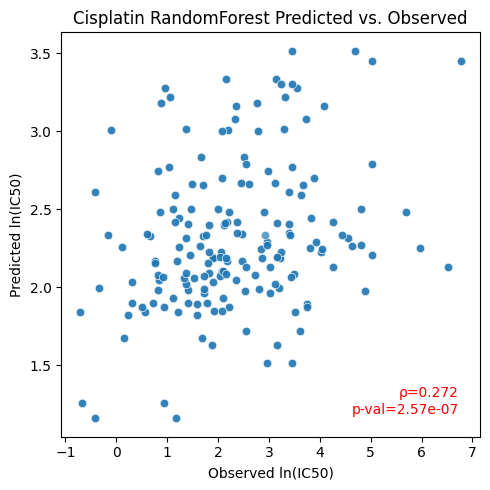

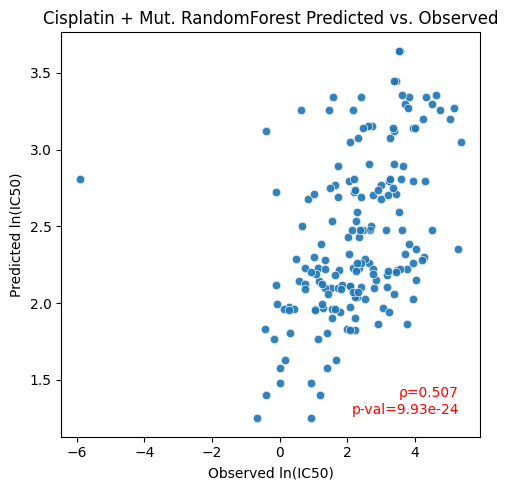

In [6]:
plot_pred_vs_obs(cis_rf["y_test"], cis_rf["y_pred"], "Cisplatin RandomForest Predicted vs. Observed")
plot_pred_vs_obs(cis_mut_rf["y_test"], cis_mut_rf["y_pred"], "Cisplatin + Mut. RandomForest Predicted vs. Observed")

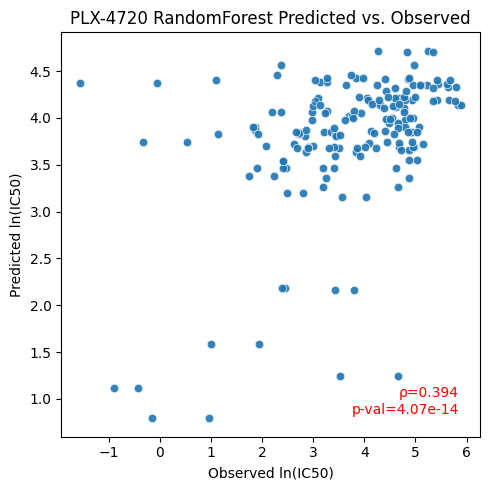

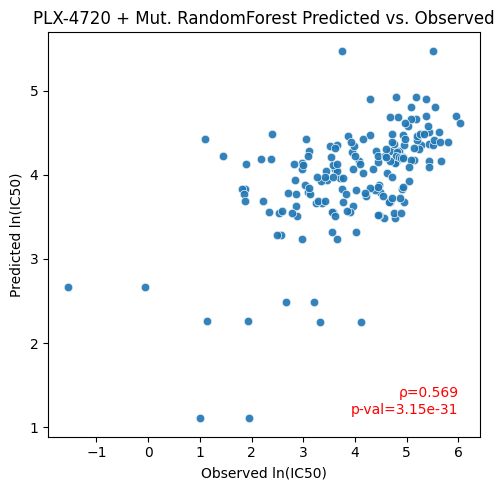

In [7]:
plot_pred_vs_obs(plx_rf["y_test"], plx_rf["y_pred"], "PLX-4720 RandomForest Predicted vs. Observed")
plot_pred_vs_obs(plx_mut_rf["y_test"], plx_mut_rf["y_pred"], "PLX-4720 + Mut. RandomForest Predicted vs. Observed")

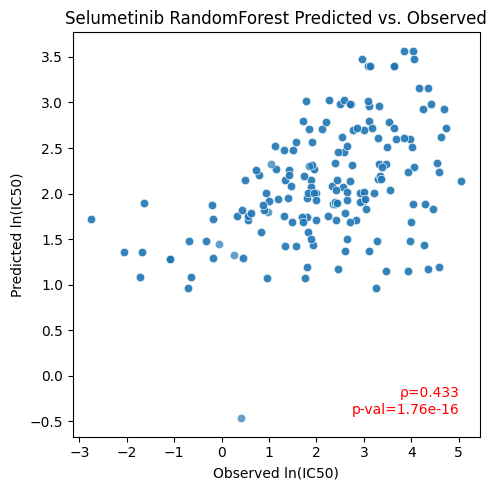

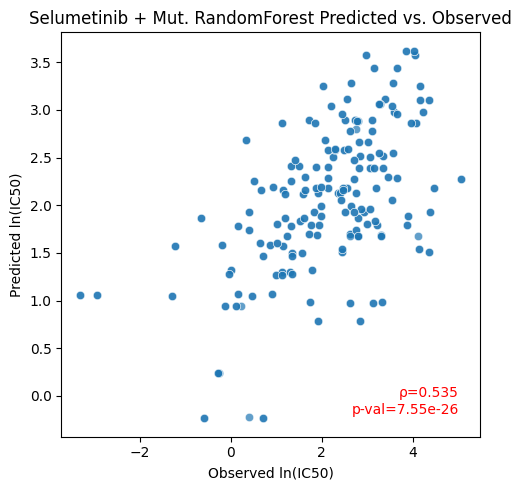

In [8]:
plot_pred_vs_obs(sel_rf["y_test"], sel_rf["y_pred"], "Selumetinib RandomForest Predicted vs. Observed")
plot_pred_vs_obs(sel_mut_rf["y_test"], sel_mut_rf["y_pred"], "Selumetinib + Mut. RandomForest Predicted vs. Observed")

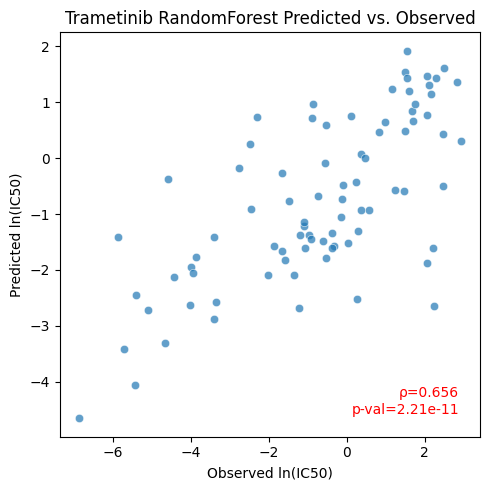

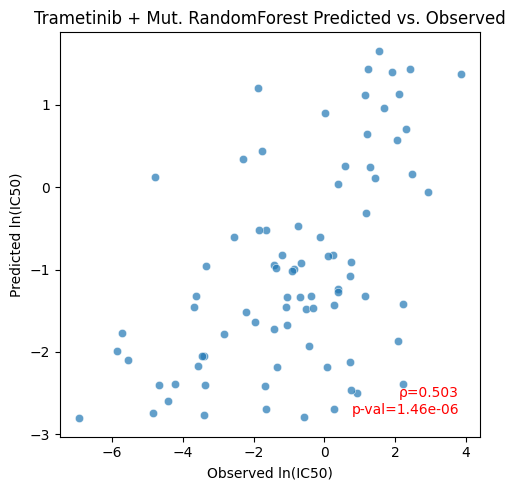

In [9]:
plot_pred_vs_obs(tra_rf["y_test"], tra_rf["y_pred"], "Trametinib RandomForest Predicted vs. Observed")
plot_pred_vs_obs(tra_mut_rf["y_test"], tra_mut_rf["y_pred"], "Trametinib + Mut. RandomForest Predicted vs. Observed")

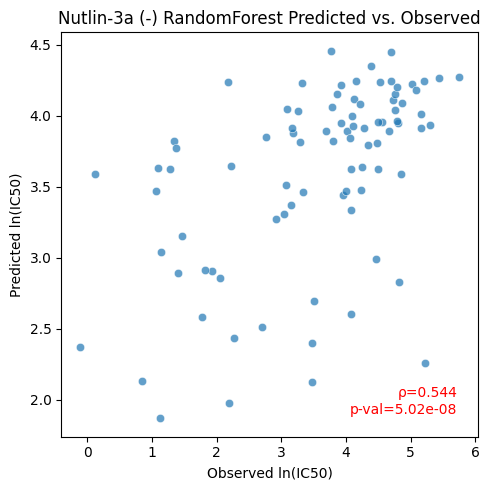

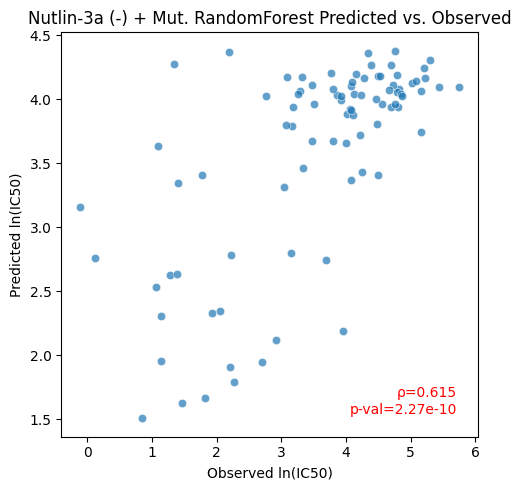

In [10]:
plot_pred_vs_obs(nut_rf["y_test"], nut_rf["y_pred"], "Nutlin-3a (-) RandomForest Predicted vs. Observed")
plot_pred_vs_obs(nut_mut_rf["y_test"], nut_mut_rf["y_pred"], "Nutlin-3a (-) + Mut. RandomForest Predicted vs. Observed")

In [1]:
import pickle
import numpy as np

# Load all results
files = {
    "Cisplatin": ("saved_results/Cisplatin_rf.pkl", "saved_results/Cisplatin_mut_rf.pkl"),
    "PLX-4720": ("saved_results/PLX-4720_rf.pkl", "saved_results/PLX-4720_mut_rf.pkl"),
    "Selumetinib": ("saved_results/Selumetinib_rf.pkl", "saved_results/Selumetinib_mut_rf.pkl"),
    "Trametinib": ("saved_results/Trametinib_rf.pkl", "saved_results/Trametinib_mut_rf.pkl"),
    "Nutlin-3a (-)": ("saved_results/Nutlin-3a (-)_rf.pkl", "saved_results/Nutlin-3a (-)_mut_rf.pkl")
}

for drug, (f_standard, f_mut) in files.items():
    with open(f_standard, "rb") as f:
        standard = pickle.load(f)
    with open(f_mut, "rb") as f:
        mut = pickle.load(f)
    
    # Each .fit_time may be a list or array of times (e.g., from CV folds)
    standard_avg = np.mean(standard.get("fit_time", []))
    mut_avg = np.mean(mut.get("fit_time", []))
    
    print(f"{drug}:")
    print(f"  ElasticNet standard average fit time: {standard_avg:.4f} s")
    print(f"  ElasticNet + mutation average fit time: {mut_avg:.4f} s\n")


Cisplatin:
  ElasticNet standard average fit time: 1486.9712 s
  ElasticNet + mutation average fit time: 1487.1691 s

PLX-4720:
  ElasticNet standard average fit time: 1575.1106 s
  ElasticNet + mutation average fit time: 1532.3851 s

Selumetinib:
  ElasticNet standard average fit time: 1282.0442 s
  ElasticNet + mutation average fit time: 1272.8632 s

Trametinib:
  ElasticNet standard average fit time: 475.4934 s
  ElasticNet + mutation average fit time: 492.4069 s

Nutlin-3a (-):
  ElasticNet standard average fit time: 535.6381 s
  ElasticNet + mutation average fit time: 548.8906 s



## Takeaways:

### In comparison with ElasticNet, RandomForest seems to have a weaker performance but these models are also more positively influenced by the inclusion of mutation data. A key example of this is Cisplatin, which I hypothesized would perform more ideally with RandomForest than ElasticNet. 

### Interestingly enough, it performed worse with the standard data but then increased significantly with the mutation data added. It's possible that the non-linearity of RandomForest allowed for the mutation data to be more helpful in the regression task.

### The only drug that doesn't follow this trend is Trametimib, where including the mutation data decreased the Spearman coefficient. 

### Although I did mostly see improvements, the computational time cost was much more extensive than ElasticNet. Where most of the fit times for ElasticNet were < 1 second, the fit times for RandomForest ranged from ~ 500 to ~ 1500 seconds. The computational costs weren't justifiable for the slight improvements on this scale. 